<a href="https://colab.research.google.com/github/leonardogolinelli/small_RNA_velocity_project/blob/main/RNA_velocity_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

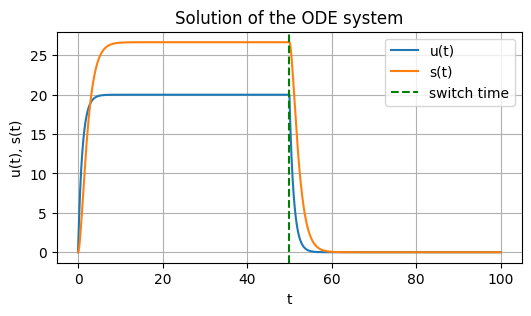

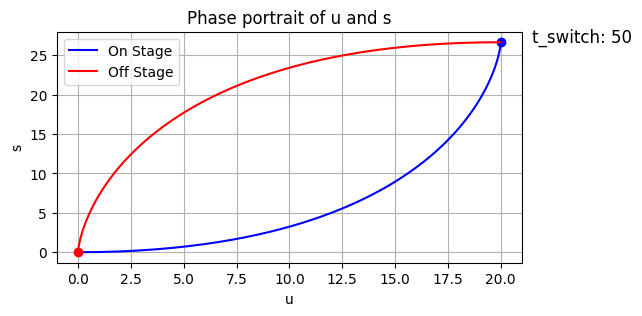

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def on_stage_solution(t, u0, s0, alfa, beta, gamma):
    # specify your analytical solution for the on_stage here
    u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
    s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
    return u, s

def off_stage_solution(t, u_switch, s_switch, beta, gamma):
    # specify your analytical solution for the off_stage here
    u =  u_switch*np.exp(-beta*(t-t_switch))
    s =  s_switch*np.exp(-gamma*(t-t_switch)) - ((beta * u_switch/(gamma-beta))) * (np.exp(-gamma*(t-t_switch))-np.exp(-beta*(t-t_switch)))
    return u, s

def simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma):
    # on_stage
    t_on = np.linspace(0, t_switch, 1000)
    #alfa_on = np.sin(t_on/5)
    u_on, s_on = on_stage_solution(t_on, u0, s0, alfa_on, beta, gamma)

    # extract final condition after on_stage
    u_switch, s_switch = on_stage_solution(t_switch, u0, s0, alfa_on, beta, gamma)

    # off_stage
    t_off = np.linspace(t_switch, t_final, 1000)
    u_off, s_off = off_stage_solution(t_off, u_switch, s_switch, beta, gamma)

    # combine solutions
    t = np.concatenate((t_on, t_off))
    u = np.concatenate((u_on, u_off))
    s = np.concatenate((s_on, s_off))

    return t, u, s

# your initial condition, time and parameters here
u0 = 0
s0 = 0
t_switch = 50
t_final = 100
alfa_on = 20
beta = 1
gamma = 0.75

t, u, s = simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma)

# plotting the solutions
plt.figure(figsize=(6, 3))
plt.plot(t, u, label='u(t)')
plt.plot(t, s, label='s(t)')
plt.axvline(x = t_switch, color='green', linestyle='--', label = 'switch time')
plt.legend()
plt.grid(True)
plt.title('Solution of the ODE system')
plt.xlabel('t')
plt.ylabel('u(t), s(t)')
plt.show()

plt.figure(figsize=(6, 3))

# Plot on stage (use color blue for 'on-stage')
plt.plot(u[:1000], s[:1000], 'b-', label='On Stage')

# Mark the point at the end of on stage
plt.plot(u[999], s[999], 'bo')

# Plot off stage (use color red for 'off-stage')
plt.plot(u[1000:], s[1000:], 'r-', label='Off Stage')

# Mark the point at the end of off stage
plt.plot(u[-1], s[-1], 'ro')

plt.grid(True)
plt.title('Phase portrait of u and s')
plt.xlabel('u')
plt.ylabel('s')
plt.legend()
plt.text(x=u[999]+1.5, y=s[999], s=f't_switch: {t_switch}', fontsize=12)
plt.show()


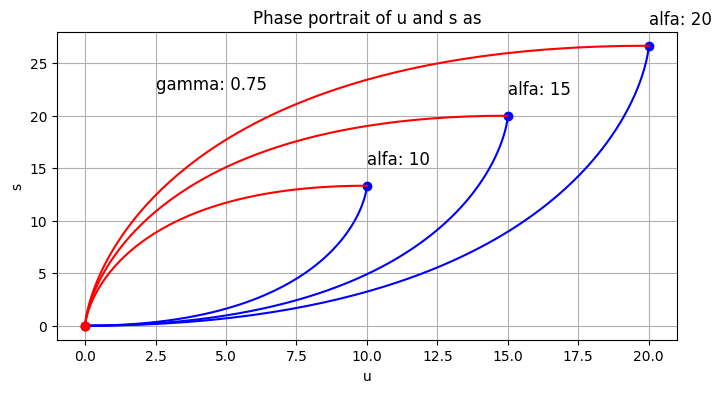

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def on_stage_solution(t, u0, s0, alfa, beta, gamma):
    # specify your analytical solution for the on_stage here
    u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
    s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
    return u, s

def off_stage_solution(t, u_switch, s_switch, beta, gamma):
    # specify your analytical solution for the off_stage here
    u =  u_switch*np.exp(-beta*(t-t_switch))
    s =  s_switch*np.exp(-gamma*(t-t_switch)) - ((beta * u_switch/(gamma-beta))) * (np.exp(-gamma*(t-t_switch))-np.exp(-beta*(t-t_switch)))
    return u, s

def simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma):
    # on_stage
    t_on = np.linspace(0, t_switch, 1000)
    #alfa_on = np.sin(t_on/5)
    u_on, s_on = on_stage_solution(t_on, u0, s0, alfa_on, beta, gamma)

    # extract final condition after on_stage
    u_switch, s_switch = on_stage_solution(t_switch, u0, s0, alfa_on, beta, gamma)

    # off_stage
    t_off = np.linspace(t_switch, t_final, 1000)
    u_off, s_off = off_stage_solution(t_off, u_switch, s_switch, beta, gamma)

    # combine solutions
    t = np.concatenate((t_on, t_off))
    u = np.concatenate((u_on, u_off))
    s = np.concatenate((s_on, s_off))

    return t, u, s

# your initial condition, time and parameters here
u0 = 0
s0 = 0
t_switch = 50
t_final = 100
alfa_on_vals = [10, 15, 20]
beta = 1
gamma = 0.75

plt.figure(figsize=(8, 4))

for alfa_on in alfa_on_vals:
  t, u, s = simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma)

  # Plot on stage (use color blue for 'on-stage')
  plt.plot(u[:1000], s[:1000], 'b-', label=f'alfa: {alfa_on}')

  # Mark the point at the end of on stage
  plt.plot(u[999], s[999], 'bo')

  # Plot off stage (use color red for 'off-stage')
  plt.plot(u[1000:], s[1000:], 'r-', label=f'alfa: {alfa_on}')

  # Mark the point at the end of off stage
  plt.plot(u[-1], s[-1], 'ro')

  plt.text(x=u[999-3], y=s[999]+2, s=f'alfa: {alfa_on}', fontsize=12)

plt.grid(True)
plt.title('Phase portrait of u and s as')
plt.xlabel('u')
plt.ylabel('s')
plt.text(x=2.5, y=22.5, s=f'gamma: {gamma}', fontsize=12)
#plt.legend()
plt.show()


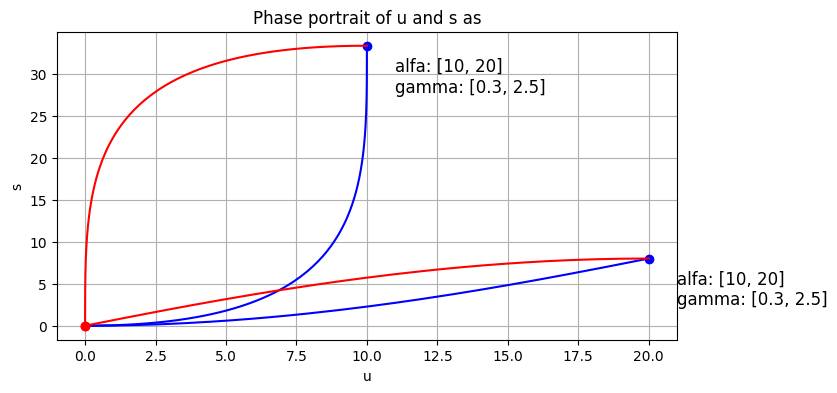

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def on_stage_solution(t, u0, s0, alfa, beta, gamma):
    # specify your analytical solution for the on_stage here
    u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
    s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
    return u, s

def off_stage_solution(t, u_switch, s_switch, beta, gamma):
    # specify your analytical solution for the off_stage here
    u =  u_switch*np.exp(-beta*(t-t_switch))
    s =  s_switch*np.exp(-gamma*(t-t_switch)) - ((beta * u_switch/(gamma-beta))) * (np.exp(-gamma*(t-t_switch))-np.exp(-beta*(t-t_switch)))
    return u, s

def simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma):
    # on_stage
    t_on = np.linspace(0, t_switch, 1000)
    #alfa_on = np.sin(t_on/5)
    u_on, s_on = on_stage_solution(t_on, u0, s0, alfa_on, beta, gamma)

    # extract final condition after on_stage
    u_switch, s_switch = on_stage_solution(t_switch, u0, s0, alfa_on, beta, gamma)

    # off_stage
    t_off = np.linspace(t_switch, t_final, 1000)
    u_off, s_off = off_stage_solution(t_off, u_switch, s_switch, beta, gamma)

    # combine solutions
    t = np.concatenate((t_on, t_off))
    u = np.concatenate((u_on, u_off))
    s = np.concatenate((s_on, s_off))

    return t, u, s

# your initial condition, time and parameters here
u0 = 0
s0 = 0
t_switch = 50
t_final = 100
alfa_on = [10, 20]
beta = 1
gamma = [0.3, 2.5]

plt.figure(figsize=(8, 4))

for i in range(2):
  t, u, s = simulation(u0, s0, t_switch, t_final, alfa_on[i], beta, gamma[i])

  # Plot on stage (use color blue for 'on-stage')
  plt.plot(u[:1000], s[:1000], 'b-', label=f'alfa: {alfa_on}')

  # Mark the point at the end of on stage
  plt.plot(u[999], s[999], 'bo')

  # Plot off stage (use color red for 'off-stage')
  plt.plot(u[1000:], s[1000:], 'r-', label=f'alfa: {alfa_on}')

  # Mark the point at the end of off stage
  plt.plot(u[-1], s[-1], 'ro')

  plt.text(x=u[999]+1, y=s[999]-3, s=f'alfa: {alfa_on}', fontsize=12)
  plt.text(x=u[999]+1, y=s[999]-5.5, s=f'gamma: {gamma}', fontsize=12)

plt.grid(True)
plt.title('Phase portrait of u and s as')
plt.xlabel('u')
plt.ylabel('s')
#plt.legend()
plt.show()


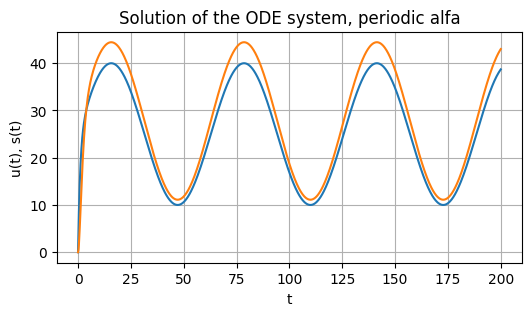

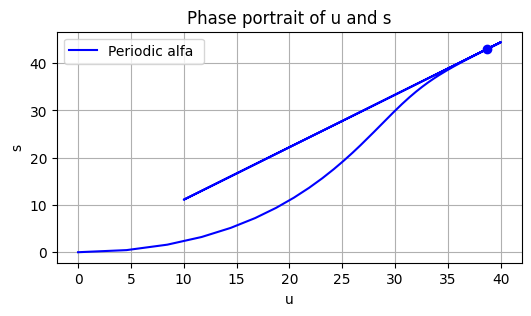

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def on_stage_solution(t, u0, s0, alfa, beta, gamma):
    # specify your analytical solution for the on_stage here
    u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
    s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
    return u, s

    return u, s

def simulation(u0, s0, t_switch, t_final, beta, gamma):
    # on_stage
    t_on = np.linspace(0, t_switch, 1000)
    alfa_on = 25 + 15 * (np.sin(0.1*t_on))
    u, s = on_stage_solution(t_on, u0, s0, alfa_on, beta, gamma)

    return t_on, u, s

# your initial condition, time and parameters here
u0 = 0
s0 = 0
t_switch = 200
t_final = 200
beta = 1
gamma = 0.9

t, u, s = simulation(u0, s0, t_switch, t_final, beta, gamma)

# plotting the solutions
plt.figure(figsize=(6, 3))
plt.plot(t, u, label='u(t)')
plt.plot(t, s, label='s(t)')
plt.grid(True)
plt.title('Solution of the ODE system, periodic alfa')
plt.xlabel('t')
plt.ylabel('u(t), s(t)')
plt.show()

plt.figure(figsize=(6, 3))

# Plot on stage (use color blue for 'on-stage')
plt.plot(u[:1000], s[:1000], 'b-', label='Periodic alfa ')

# Mark the point at the end of on stage
plt.plot(u[999], s[999], 'bo')

plt.grid(True)
plt.title('Phase portrait of u and s')
plt.xlabel('u')
plt.ylabel('s')
plt.legend()
plt.show()


##In the stochastic model of the "on" stage with zero initial data, u and s are poisson distributed with mean a(t) and b(t) respectively.

The master chemical equation in the on stage with zero initial data has analytical solution:



```
Pon = ((a_t**m)*(b_t**n)/(np.math.factorial(m)*np.math.factorial(n)))*np.exp(-a-b)
```


where Pon is the probability that u, s transitions from state 0,0 to state m,n.
In this case, u(t) and s(t) are poisson distributed with mean a(t), b(t) respectively.



```
a_t = (alfa/beta) * (1-np.exp(-beta*t))
b_t = (alfa/gamma)*(1-np.exp(-gamma*t))+(alfa/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
```



In [ ]:
def Pon(a_t, b_t, m, n, t): #probability that u, s transitions from state 0,0 to state m,n
  return ((a_t**m)*(b_t**n)/(np.math.factorial(m)*np.math.factorial(n)))*np.exp(-a-b)

In [ ]:
def a_t(alfa, beta, t):
  return (alfa/beta) * (1-np.exp(-beta*t))

In [ ]:
def b_t(alfa, beta, gamma, t):
  return (alfa/gamma)*(1-np.exp(-gamma*t))+(alfa/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))

In [ ]:
t_range = np.linspace(0,50,100)
a = a_t(20, 1, t_range)
a

array([ 0.        ,  7.93049808, 12.71635617, 15.60450234, 17.34742663,
       18.39923803, 19.03398002, 19.417031  , 19.64819272, 19.78769307,
       19.87187806, 19.9226816 , 19.95334027, 19.97184201, 19.98300736,
       19.98974536, 19.99381158, 19.99626544, 19.99774629, 19.99863994,
       19.99917924, 19.99950469, 19.99970109, 19.99981962, 19.99989114,
       19.99993431, 19.99996036, 19.99997608, 19.99998556, 19.99999129,
       19.99999474, 19.99999683, 19.99999809, 19.99999884, 19.9999993 ,
       19.99999958, 19.99999975, 19.99999985, 19.99999991, 19.99999994,
       19.99999997, 19.99999998, 19.99999999, 19.99999999, 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.  

In [ ]:
t_range = np.linspace(0,50,100)
b = b_t(20, 1, 0.75, t_range)
b

array([ 0.        ,  1.91098532,  5.79574449, 10.01035149, 13.83430597,
       17.01874408, 19.54079424, 21.47382302, 22.92178918, 23.98829422,
       24.76383895, 25.32219589, 25.72100197, 26.0040207 , 26.20381156,
       26.34423374, 26.44256844, 26.51121828, 26.55901936, 26.5922294 ,
       26.61525832, 26.63120121, 26.64222288, 26.64983313, 26.6550823 ,
       26.65869959, 26.66119034, 26.6629042 , 26.66408277, 26.6648928 ,
       26.66544929, 26.66583143, 26.66609376, 26.66627378, 26.66639728,
       26.666482  , 26.66654009, 26.66657992, 26.66660722, 26.66662593,
       26.66663876, 26.66664755, 26.66665357, 26.6666577 , 26.66666052,
       26.66666246, 26.66666378, 26.66666469, 26.66666531, 26.66666574,
       26.66666603, 26.66666623, 26.66666637, 26.66666646, 26.66666653,
       26.66666657, 26.6666666 , 26.66666662, 26.66666664, 26.66666665,
       26.66666665, 26.66666666, 26.66666666, 26.66666666, 26.66666666,
       26.66666666, 26.66666667, 26.66666667, 26.66666667, 26.66

In [ ]:
np.random.poisson(a)

0

In [ ]:
pon, a, b = Pon(20, 1, 0.9, 1, 1, 0.001)

0.019990003332499562
9.993668924491994e-06


Simulation of the on stage deterministic vs stochastic model with 0 0 initial condition

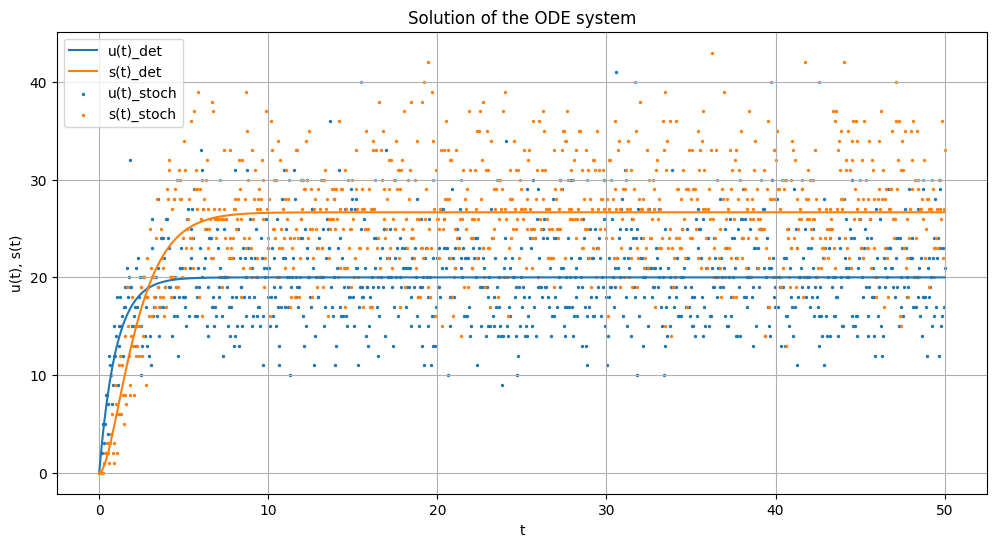

(1000,)


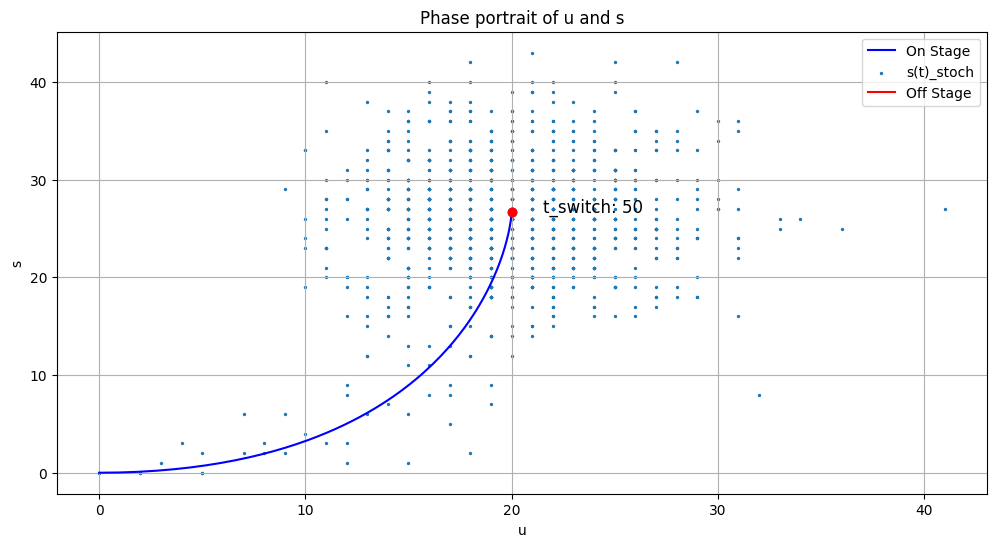

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def a_t(alfa, beta, t):
  return (alfa/beta) * (1-np.exp(-beta*t))

def b_t(alfa, beta, gamma, t):
  return (alfa/gamma)*(1-np.exp(-gamma*t))+(alfa/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))

def on_stage_solution_deterministic(t, u0, s0, alfa, beta, gamma):
    # specify your analytical solution for the on_stage here
    u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
    s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
    return u, s

def on_stage_solution_stochastic(t, alfa, beta, gamma): #with u0, s0 = 0,0
    # specify your analytical solution for the on_stage here
    a = a_t(alfa, beta, t)
    b =  b_t(alfa, beta, gamma, t)
    return a, b

def simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma):
    # on_stage
    t = np.linspace(0, t_switch, 1000)
    #alfa_on = np.sin(t_on/5)
    u, s = on_stage_solution_deterministic(t, u0, s0, alfa_on, beta, gamma)
    a, b = on_stage_solution_stochastic(t, alfa_on, beta, gamma)

    return t, u, s, a, b

# your initial condition, time and parameters here
u0 = 0
s0 = 0
t_switch = 50
t_final = 100
alfa_on = 20
beta = 1
gamma = 0.75

t, u, s, a, b = simulation(u0, s0, t_switch, t_final, alfa_on, beta, gamma)
u_stoc = np.random.poisson(a)
s_stoc = np.random.poisson(b)

plt.figure(figsize=(12, 6))
# plotting the solutions
plt.plot(t, u, label='u(t)_det')
plt.plot(t, s, label='s(t)_det')
plt.scatter(t, u_stoc, label='u(t)_stoch', s=2)
plt.scatter(t, s_stoc, label='s(t)_stoch', s=2)
#plt.axvline(x = t_switch, color='green', linestyle='--', label = 'switch time')
plt.legend()
plt.grid(True)
plt.title('Solution of the ODE system')
plt.xlabel('t')
plt.ylabel('u(t), s(t)')
plt.show()


plt.figure(figsize=(12, 6))

print(u.shape)

# Plot on stage (use color blue for 'on-stage')
plt.plot(u[:1000], s[:1000], 'b-', label='On Stage')
plt.scatter(u_stoc, s_stoc, label='s(t)_stoch', s=2)



# Mark the point at the end of on stage
plt.plot(u[999], s[999], 'bo')

# Plot off stage (use color red for 'off-stage')
plt.plot(u[1000:], s[1000:], 'r-', label='Off Stage')

# Mark the point at the end of off stage
plt.plot(u[-1], s[-1], 'ro')

plt.grid(True)
plt.title('Phase portrait of u and s')
plt.xlabel('u')
plt.ylabel('s')
plt.legend()
plt.text(x=u[999]+1.5, y=s[999], s=f't_switch: {t_switch}', fontsize=12)
plt.show()


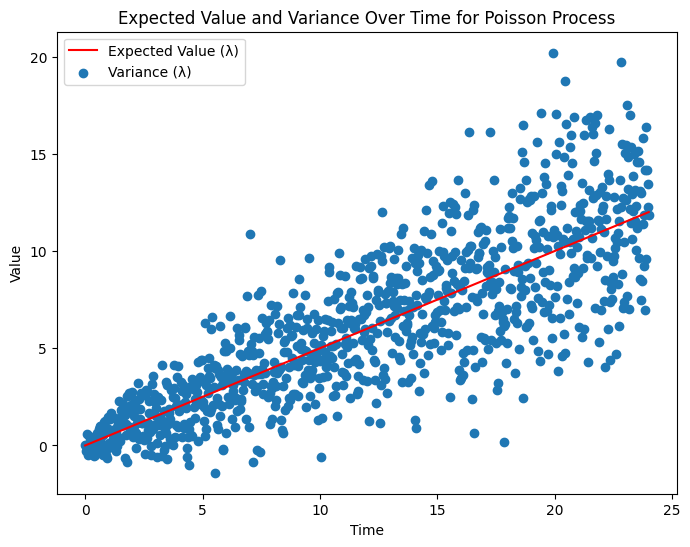

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def lambda_t(t, k):  # Function for time-dependent λ(t)
    return k*t

k = 0.5  # For example
time_values = np.linspace(0, 24, 1000)  # Suppose time varies from 0 to 24 hours

lambda_values = lambda_t(time_values, k)
dist = np.random.normal(lambda_values, np.sqrt(lambda_values))


plt.figure(figsize=(8, 6))
plt.plot(time_values, lambda_values, label='Expected Value (λ)', color = 'r')
plt.scatter(time_values, dist, label='Variance (λ)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Expected Value and Variance Over Time for Poisson Process')
plt.show()
